In [1]:
#Making general imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn import metrics
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz , plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


from sklearn.neural_network import MLPClassifier

from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.regularizers import l1_l2

## Single experiment

<b>1. Simulate the decay times of 1000 muons<b/>

In [76]:
#Generating a random sample of 1500 muon decay times
decay_times = np.random.exponential(scale=2.2e-6,size = 1500)

In [77]:
#Selecting muon decays with lifetimes between 0 and 10 microseconds
decays_cut = np.where(decay_times<10e-6)[0]

In [78]:
#Selecting 1000 muon decays from the decays between 0 and 10 microseconds
decay_sample = decay_times[decays_cut[:1000]]

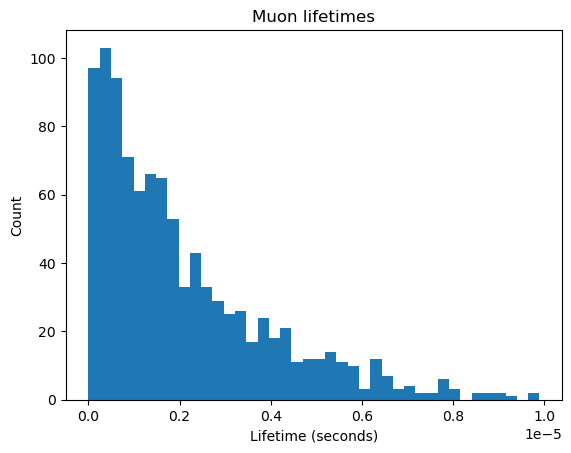

In [79]:
plt.hist(decay_sample, bins=40)
#plt.savefig('outputHistogram.pdf')
plt.title("Muon lifetimes")
plt.xlabel("Lifetime (seconds)")
plt.ylabel("Count")
plt.show()

<b>2. Estimate the lifetime of the muon<b/>

In [80]:
#Estimate of the muon lifetime from this dataset
#Taking the mean of all the datapoints
mean_lifetime = decay_sample.mean()
print("Mean muon lifetime from dataset =",mean_lifetime,"seconds")

Mean muon lifetime from dataset = 2.079653901251733e-06 seconds


Mean muon lifetime found through this dataset is lower than the actual lifetime of the muon which is 2.2e-6 microseconds.

The value that we have obtained is lower than the actual value because we have cut off the tail of the exponential distribution at 10 microseconds. The exponential distribution can otherwise produce decay times between 0ms and infinity. In this way we are disregarding rare decay times that happen to be longer than 10 microseconds. As a result of the missing longer lifetimes, we get an lower average value.

## Repeat 500 times

<b>3. Repeat the experiment 500 times and obtain distribution of mean lifetimes<b/>

In [100]:
#Function for the experiment
def experiment(lifetime,sample_size):
    decay_times = np.random.exponential(scale=lifetime,size = int(1.5*sample_size))
    decays_cut = np.where(decay_times<10e-6)[0]
    decay_sample = decay_times[decays_cut[:sample_size]]
    return decay_sample.mean()

In [112]:
#Repeat experiment 500 times
mean_lifetimes = np.array([])
for i in range(0,500):
    mean_lifetime = experiment(2.2e-6,1000)
    mean_lifetimes = np.append(mean_lifetimes,mean_lifetime)
    

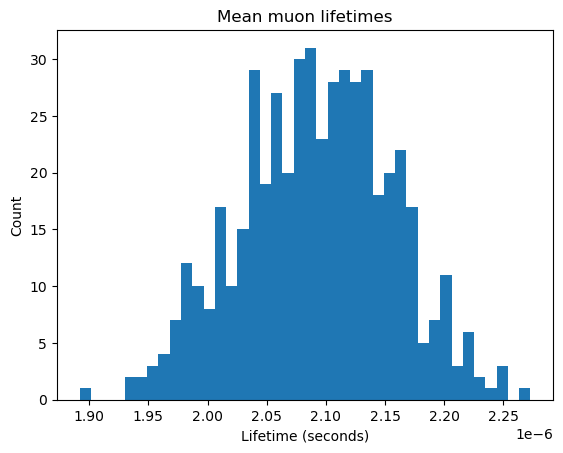

In [136]:
#Plotting the distribution of mean lifetimes obtained from the 500 experiments
plt.hist(mean_lifetimes, bins=40)
#plt.savefig('outputHistogram.pdf')
plt.title("Mean muon lifetimes")
plt.xlabel("Lifetime (seconds)")
plt.ylabel("Count")
plt.show()

<b>4. What do we learn from the distribution?<b/>

<b>a) How well (with what numerical precision) can you expect to estimate the true
lifetime from any single experiment?<b/>

In [114]:
#Standard deviation of the gaussain distribution
std_of_dist = mean_lifetimes.std()
std_of_dist

In [128]:
print("""The numerical precision of estimating the true lifetime for any single experiment is 
equal to the standard deviation of multiple experiments: """, std_of_dist)

The numerical precision of estimating the true lifetime for any single experiment is 
equal to the standard deviation of multiple experiments:  6.394320414005588e-08


From any single experiment we expect to estimate the true lifetime of a muon with a numerical precision that is equal to the standard deviation of the gaussian distribution. This is because the standard deviation calculated by performing numerous experiments gives the precision of estimating the true lifetime for any single experiment. 

<b>b) Is the method biased? What is the bias and precision on the bias?<b/>

In [130]:
#Mean of the gaussain distribution
mean_of_dist = mean_lifetimes.mean()
mean_of_dist

2.0923154147048713e-06

The method is biased as it uses a truncated version (0 to 10ms) of the complete exponential distribution of the decay times of muons. The exponential distribution can otherwise produce decay times between 0ms and infinity. The estimate of the mean decay time of muons is missing longer lived muons and hence the average lifetime is pulled down and becomes biased. 

Further indication of the bias is given by the estimated muon lifetime lying more than 1 std away from the true lifetime.

The bias is given by = |true value - estimated value|, ie the absolute difference between the true and experimentally obtained values.

In [131]:
#The method is biased and the bias is given by the difference between the actual value and the obtained value
bias = 2.2e-6-mean_of_dist
print("The bias of the experiment is: ", bias, "seconds")

The bias of the experiment is:  1.0768458529512886e-07 seconds


The precision on the bias is given by the standard error of the mean of the distribution. This is because the precision on the bias is a measure of how precise the mean of the distribution is.

In [137]:
#Error on the knowledge of the mean = Standard error of the mean
SEM = std_of_dist/np.sqrt(500)

In [138]:
#The precision on the bias is given by the standard error of the mean of the distribution
print("Precision on the bias is: ", SEM)


Precision on the bias is:  2.8596270231262186e-09
